# TP3 Bootstrap et méthode gloutonne

In [20]:
# Import des librairies pour l'exercice 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import signal
from scipy.fftpack import fft, fftshift
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Q1

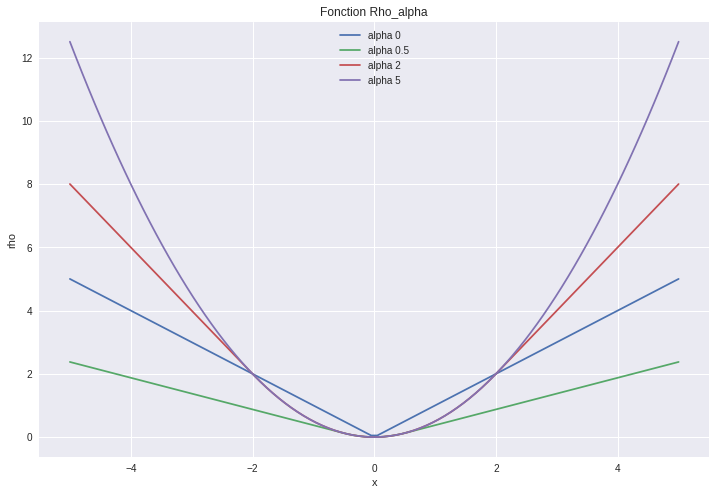

In [2]:
# rho_alpha()
x = np.linspace(-5.0, 5.0, num=100).reshape(100, 1)

alpha = 0
alpha_1 = 0.5
alpha_2 = 2
alpha_3 = 5


def rho_alpha(x, alpha):

    if alpha == 0:
        y = np.abs(x)

    else:
        y = np.zeros(x.shape)
        y = alpha * np.abs(x) - alpha ** 2 / 2
        b = np.abs(x) <= alpha
        y[b] = x[b]**2 / 2

    return y


fig = plt.figure(figsize=(12, 8))

plt.plot(x, rho_alpha(x, alpha), label='alpha 0')
plt.plot(x, rho_alpha(x, alpha_1), label='alpha 0.5')
plt.plot(x, rho_alpha(x, alpha_2), label='alpha 2')
plt.plot(x, rho_alpha(x, alpha_3), label='alpha 5')
plt.title("Fonction Rho_alpha")
plt.xlabel("x")
plt.ylabel("rho")
plt.legend(loc='upper center')

plt.show()

# Q2

In [3]:
# Génération du bruit

theta_0 = 1
theta = np.array([1, 1])

xi = np.random.rand(100, 2)

epsilon = np.random.randn(100,)

yi = theta_0 + np.dot(xi, theta) + epsilon

print(yi)
yi.shape

[ 0.21047248  1.01608982  3.19036191  1.40761691  2.68195197  1.38885673
  3.13728099 -0.55096551  2.69725634  2.12769612  2.71390559  0.21169159
  0.56876601  2.76497538  2.52197738  3.88791492  1.89424496  1.20302775
 -1.23486843  1.56461689  3.8827327   3.47863514  2.53677506  3.40096428
  1.61016162  3.18098472  2.94511809  2.61987416  2.74455717  1.98953294
  0.63398013  3.73964582  2.76930141  3.21375445  1.54993889  3.93494152
  3.24870983  2.82950042 -0.22513446  1.73893036  1.33767259  2.26506944
  0.88666164  1.78460879  2.96771678  1.057773    1.3243023   0.50676507
  1.15022101  2.90480699  1.16750909  1.90089399  1.69711306  2.48991245
  2.7168889   3.47054512  0.48743326  3.98124629  1.45675545  1.86447683
  3.40681427  3.11677073  2.88733806  2.34217585  2.08254844  2.05634909
  3.67067354  3.50998554  2.8021761   0.54732554  1.0008801   1.3930221
  1.43354306  1.36796127  2.01817378  3.02721554  4.00866505  3.0264314
  1.33466775  3.40033915  1.64855212  4.49261006  1.3

(100,)

# Q3

In [26]:
from scipy.optimize import minimize

alpha_2 = 2


def f(thetas):
    theta0, theta1, theta2 = thetas
    theta = np.array([theta1, theta2])
    return rho_alpha(yi - theta0 - np.dot(xi, theta), alpha_2).sum()


def estimThet():
    est = minimize(f, np.zeros((3, 1)), method='nelder-mead',
                   options={'xtol': 1e-5})
    return est


resultat = estimThet()
print("Thetas chapeau = ", resultat.x)

Thetas chapeau =  [ 2.38147274  0.11525456 -0.59935651]


# Q4

In [27]:
alpha_2 = 2

residus = yi - resultat.x[0] - np.dot(xi, resultat.x[1:])

res_boot = np.random.choice(residus, size=len(residus), replace=True, p=None)

yi_star = resultat.x[0] + np.dot(xi, resultat.x[1:]) + res_boot


def f(thetas):
    theta0, theta1, theta2 = thetas
    theta = np.array([theta1, theta2])
    return rho_alpha(yi_star - theta0 - np.dot(xi, theta), alpha_2).sum()


def estimThet():
    est = minimize(f, np.zeros((3, 1)), method='nelder-mead',
                   options={'xtol': 1e-5})
    return est


res_boot = estimThet()
print("Thetas chapeau étoiles = ", res_boot.x)

Thetas chapeau étoiles =  [ 1.71559849  0.90951322 -0.18276927]


# Q5

In [6]:
def bootstrap_200(y, alpha):
    residus = yi - resultat.x[0] - np.dot(xi, resultat.x[1:])

    res_boot = np.random.choice(
        residus, size=len(residus), replace=True, p=None)

    yi_star = resultat.x[0] + np.dot(xi, resultat.x[1:]) + res_boot

    def f(thetas):
        theta0, theta1, theta2 = thetas
        theta = np.array([theta1, theta2])
        return rho_alpha(yi_star - theta0 - np.dot(xi, theta), alpha).sum()

    def estimThet():
        est = minimize(f, np.zeros((3, 1)), method='nelder-mead',
                       options={'xtol': 1e-5})
        return est

    res_boot = estimThet()

    return res_boot.x


B_stock = np.empty([200, 3])
for el in range(200):
    B_stock[el] = bootstrap_200(yi, alpha)

V_boot = np.cov(B_stock.T)
print("V_boot = ", V_boot)
print("\n")
B_boot = (B_stock - res_boot.x).sum() / 200
print("B_boot = ", B_boot)
print("\n")
EQM = (np.linalg.norm(B_stock - resultat.x)**2) / 200
print("EQM = ", EQM)

V_boot =  [[ 0.18816628 -0.15884441 -0.15252945]
 [-0.15884441  0.26183574  0.03641868]
 [-0.15252945  0.03641868  0.23996763]]


B_boot =  -0.621471957253


EQM =  0.940271300538


# Q6

In [7]:
def procedure_bootstrap(y, alpha):
    bootstrap_200(yi, alpha)
    estimThet()
            

    for i in range(200):
        B_stock[i] = bootstrap_200(yi, alpha)

    EQM = (np.linalg.norm(B_stock - resultat.x)**2) / 200
    print("EQM = ", EQM)

    return EQM

alphas = np.linspace(0, 10, num=20)
    
EQMs = [procedure_bootstrap(yi, alpha) for alpha in alphas]

EQM =  0.974824709363
EQM =  0.510984974834
EQM =  0.375366158659
EQM =  0.392110986996
EQM =  0.336423562676
EQM =  0.310606436989
EQM =  0.356142854822
EQM =  0.368616953929
EQM =  0.342656198726
EQM =  0.327690757698
EQM =  0.378657584278
EQM =  0.352949819185
EQM =  0.337717303489
EQM =  0.3490548816
EQM =  0.33946681469
EQM =  0.342186872222
EQM =  0.364268024854
EQM =  0.328100687582
EQM =  0.337453372988
EQM =  0.307922303637


In [8]:
df1 = pd.DataFrame(EQMs)
df2 = pd.DataFrame(alphas)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['EQMs', 'alphas']
df4 = df3.sort_values(by='EQMs')
print("Alpha qui minimise : ", df4.head(1)['alphas'])

Alpha qui minimise :  19    10.0
Name: alphas, dtype: float64


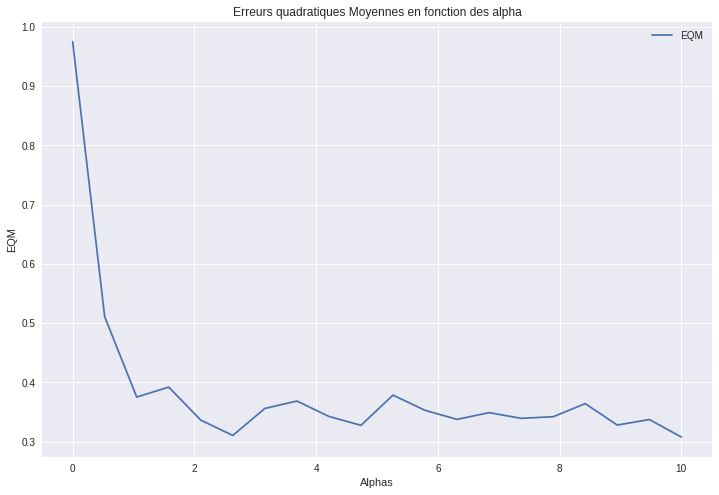

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.plot(alphas, EQMs, label='EQM')
plt.title("Erreurs quadratiques Moyennes en fonction des alpha")
plt.xlabel("Alphas")
plt.ylabel("EQM")
plt.legend(loc='upper right')

plt.show()

* On remarque une valeur abérrante pour alpha = 0 ce qui est logique car la fonction est valeur absolue

# Q7

In [10]:
alphas = np.linspace(0, 10, num=20)

xi = np.random.rand(100, 2)

# Nouveaux epsilons
epsilon_cauchy = np.random.standard_cauchy(100)

yi_cauchy = theta_0 + np.dot(xi, theta) + epsilon_cauchy

print(yi_cauchy)


def bootstrap_200(yi_cauchy, alpha):
    residus = yi_cauchy - resultat.x[0] - np.dot(xi, resultat.x[1:])

    res_boot = np.random.choice(
        residus, size=len(residus), replace=True, p=None)

    yi_star = resultat.x[0] + np.dot(xi, resultat.x[1:]) + res_boot

    def f(thetas):
        theta0, theta1, theta2 = thetas
        theta = np.array([theta1, theta2])
        return rho_alpha(yi_star - theta0 - np.dot(xi, theta), alpha).sum()

    def estimThet():
        est = minimize(f, np.zeros((3, 1)), method='nelder-mead',
                       options={'xtol': 1e-5})
        return est

    res_boot = estimThet()

    return res_boot.x


B_stock = np.empty([200, 3])
for el in range(200):
    B_stock[el] = bootstrap_200(yi_cauchy, alpha)


def procedure_bootstrap(yi_cauchy, alpha):
    bootstrap_200(yi_cauchy, alpha)
    estimThet()

    for i in range(200):
        B_stock[i] = bootstrap_200(yi_cauchy, alpha)

    EQM = (np.linalg.norm(B_stock - resultat.x)**2) / 200
    print("EQM = ", EQM)

    return EQM


alphas = np.linspace(0, 10, num=20)

EQMs = [procedure_bootstrap(yi_cauchy, alpha) for alpha in alphas]

[  2.72636837e-01   1.53100189e+00   2.29462715e+00   1.61667582e-01
   3.15417901e+00   7.27257811e+00   8.84040451e+00   6.76115589e+00
   3.39542223e+00   1.45095424e+00   2.34487922e+00   1.47638627e+00
   5.38337623e-01   3.29972984e+00   3.03693448e+00   5.83535353e+00
   2.54847614e+00   3.59027965e+00   3.36528732e+00   2.65875874e+00
  -6.44378888e-01  -3.96961435e+01   3.18202652e+00   4.37037748e+00
   1.66287951e+01   2.61902964e+00  -5.08951902e+00   2.38987245e-01
   2.14970379e+00  -8.22547766e-01   1.59537708e+00   2.11893453e+00
   2.11115086e+01   2.39425949e+00  -1.95694801e+00   2.67131428e+00
   2.79371580e+00  -2.79740192e+03   1.93231031e+00   1.60950192e+00
   2.01056187e+00  -8.76704323e-01   2.51434279e+00   2.98206917e+00
   2.68687678e+00   3.17372494e+00   3.57748843e+00   2.14103286e+00
   7.37398112e+00   1.51627659e+01   6.27475536e+00   1.65145598e+00
   1.13468103e+01   2.03385643e+00   2.03446377e+00  -1.39480528e+00
   1.47739713e+00   1.82746343e+00

In [11]:
df1 = pd.DataFrame(EQMs)
df2 = pd.DataFrame(alphas)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['EQMs', 'alphas']
df4 = df3.sort_values(by='EQMs')
print(df4.head(1)['alphas'])

2    1.052632
Name: alphas, dtype: float64


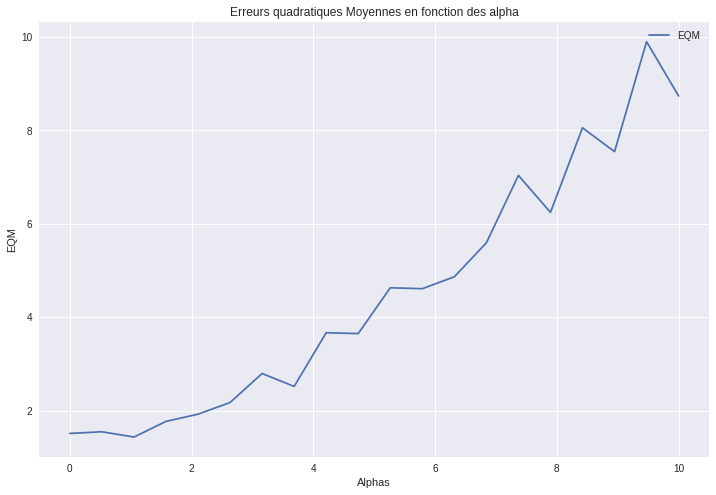

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.plot(alphas, EQMs, label='EQM')
plt.title("Erreurs quadratiques Moyennes en fonction des alpha")
plt.xlabel("Alphas")
plt.ylabel("EQM")
plt.legend(loc='upper right')

plt.show()

* Selon la loi de cauchy les erreurs quadratiques moyennes augmentent lorsque alpha augmente aussi.

# Q8

In [13]:
# Importation des données
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [29]:
y_d = diabetes.target
X_d = diabetes.data

# Exercice 2

# Q9

In [22]:
# Import des librairies pour l'exercice 2
from sklearn import preprocessing
import statsmodels.datasets as sd
df_data = sd.get_rdataset('airquality').data
import numpy as np
from sklearn.linear_model.base import LinearModel
from sklearn.base import RegressorMixin
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

data = sd.get_rdataset('airquality').data
data_temp = data.dropna()
print("{}\n\n{}".format(df_data.head(), df_data.describe()))

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

            Ozone     Solar.R        Wind        Temp       Month         Day
count  116.000000  146.000000  153.000000  153.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353    6.993464   15.803922
std     32.987885   90.058422    3.523001    9.465270    1.416522    8.864520
min      1.000000    7.000000    1.700000   56.000000    5.000000    1.000000
25%     18.000000  115.750000    7.400000   72.000000    6.000000    8.000000
50%     31.500000  205.000000    9.700000   79.000000    7.000000   16.000000
75%     63.250000  258.750000   11.500000   85.000000    8.000000   23.000000
max    168.000000  334.000000   20.700000   97.000000    9.000000   31.000000


In [23]:
y = data_temp["Ozone"]
X = data_temp[["Solar.R", "Wind", "Temp", "Month", "Day"]]

In [24]:
# Données centrées réduites
X = preprocessing.scale(X)
y = preprocessing.scale(y)

# Q10

In [25]:
import numpy as np
from sklearn.linear_model.base import LinearModel
from sklearn import datasets, linear_model
from sklearn.base import RegressorMixin
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


def stpforward(X, y, M):
    """Orthogonal Matching Pursuit model (OMP).
X: Array-like, shape (n_samples, n_features).
Training data.
y: Array-like, shape (n_samples, ).
Target values.
M: Integer, in [1,n_features]
"""
    selected_variables = []
    residual = y
    p = X.shape[1]
    coef_selected = np.zeros(p)
    for i in range(1, M + 1):
        tab_alphaj = np.zeros(p)
        for j in range(0, p):
            if(j not in selected_variables):
                Xj = X[:, j]
                valeur_alphaj = np.abs(Xj.dot(residual))
                tab_alphaj[j] = valeur_alphaj
        jmax = np.argmax(tab_alphaj)
        selected_variables.append(jmax)
        X_selected = X[:, selected_variables]
        skl_linmod = linear_model.LinearRegression(
            fit_intercept=False)
        skl_linmod.fit(X_selected, y)
        coef_selected[selected_variables] = skl_linmod.coef_
        residual = y - X_selected.dot(skl_linmod.coef_)
    return coef_selected, selected_variables

In [26]:
print(stpforward(X, y, 2))
print(stpforward(X, y, 2))
print(stpforward(X, y, 5))

(array([ 0.        , -0.35226904,  0.52339687,  0.        ,  0.        ]), [2, 1])
(array([ 0.        , -0.35226904,  0.52339687,  0.        ,  0.        ]), [2, 1])
(array([ 0.1377156 , -0.35479273,  0.54293794, -0.1346069 ,  0.07166447]), [2, 1, 0, 3, 4])


# Q11

In [43]:
class MYOMP(LinearModel, RegressorMixin):
    """Orthogonal Matching Pursuit model (OMP).
    Parameters
    ----------
    n_nonzero_coefs : int, optional
    Desired number of non-zero entries in the solution.
    If None (by default) this value is set to 10% of n_features.
    """

    def __init__(self, n_nonzero_coefs=None, fit_intercept=False, normalize=False, precompute='auto'):
        self.fit_intercept = False
        self.normalize = normalize
        self.precompute = precompute
        self.n_nonzero_coefs = n_nonzero_coefs

    def fit(self, X, y):
        """Fit the model using X, y as training data.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        self : object
        returns an instance of self.
        """
        p = X.shape[1]
        self.coef_ = np.zeros([X.shape[1], ])
        self.intercept_ = 0.
        self.selected_variables = []
        residual = y
        for i in range(1, self.n_nonzero_coefs + 1):
            tab_alphaj = np.zeros(p)
            for j in range(0, p):
                if(j not in self.selected_variables):
                    Xj = X[:, j]
                    valeur_alphaj = np.abs(Xj.dot(residual))
                    tab_alphaj[j] = valeur_alphaj
            jmax = np.argmax(tab_alphaj)
            self.selected_variables.append(jmax)
            X_selected = X[:, self.selected_variables]
            skl_linmod = linear_model.LinearRegression(
                fit_intercept=False).fit(X_selected, y)
            self.coef_[self.selected_variables] = skl_linmod.coef_
            theta_int = skl_linmod.coef_
            residual = y - X_selected.dot(theta_int)
        return self.coef_, self.selected_variables

In [28]:
test = MYOMP(n_nonzero_coefs=2, fit_intercept=False,
             normalize=False, precompute='auto')
test.fit(X, y)

print("coefficients :\n", test.coef_)
test.predict(X)

coefficients :
 [ 0.         -0.35226904  0.52339687  0.          0.        ]


array([-0.34283651, -0.12666415, -0.473861  , -1.02649264, -0.57253452,
       -1.42077197, -1.93705869, -0.46126471, -0.57704307, -0.63579249,
       -1.41626342, -0.91615218, -0.85554404, -1.98864973, -0.69547127,
       -0.8474563 , -1.01296698, -0.92688976, -0.90262653, -1.13139518,
       -0.80037382, -0.31643806,  0.48829609,  0.15369554,  0.25594825,
        0.28950508,  0.35276305,  0.42503812, -0.53711897, -1.38986497,
       -0.6322133 , -0.41962014, -0.1347519 ,  0.92329064,  0.47119124,
        0.25051033,  0.81838809,  0.19176092,  1.04450691,  1.14583027,
        1.20550904,  0.87090849, -0.6981211 , -0.31643806, -0.31192951,
        0.47927899,  0.19626947,  0.70446845,  0.98933669,  0.24242259,
        0.0930874 ,  0.58604025,  0.5905488 ,  0.36535934,  0.2478605 ,
        0.81573826,  0.70539781,  0.53988713,  0.25051033,  0.47927899,
       -0.20702697,  0.4847169 ,  1.20908824,  0.63763129,  0.86639994,
        0.29759282,  0.07691191,  0.14560779, -0.07958167,  0.42

# Q12

In [33]:
for i in range(1, 6, 1):
    coefs, variables = MYOMP(i).fit(X, y)
    print("coefs : ", coefs,  "variables : ", variables)

coefs :  [ 0.          0.          0.69854141  0.          0.        ] variables :  [2]
coefs :  [ 0.         -0.35226904  0.52339687  0.          0.        ] variables :  [2, 1]
coefs :  [ 0.16386554 -0.35641222  0.47314609  0.          0.        ] variables :  [2, 1, 0]
coefs :  [ 0.13585976 -0.3545859   0.53580317 -0.13246694  0.        ] variables :  [2, 1, 0, 3]
coefs :  [ 0.1377156  -0.35479273  0.54293794 -0.1346069   0.07166447] variables :  [2, 1, 0, 3, 4]


# Q13

In [30]:
d_OMP = dict()
for M in range(1, 6):
    test = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=M)
    test.fit(X, y)
    d_OMP[M] = test.coef_
d_OMP

{1: array([ 0.        ,  0.        ,  0.69854141,  0.        ,  0.        ]),
 2: array([ 0.        , -0.35226904,  0.52339687,  0.        ,  0.        ]),
 3: array([ 0.16386554, -0.35641222,  0.47314609,  0.        ,  0.        ]),
 4: array([ 0.13585976, -0.3545859 ,  0.53580317, -0.13246694,  0.        ]),
 5: array([ 0.1377156 , -0.35479273,  0.54293794, -0.1346069 ,  0.07166447])}

* On trouve ici des valeurs de theta qui sont les mêmes qu'à la question précédente. Les méthodes sklearn et de poursuite orthogonale mènent aux même résultat.

# Q14

In [45]:
from sklearn.model_selection import GridSearchCV

n_folds = 3
tuned_parameters = [{'n_nonzero_coefs': np.arange(1, 6, 1)}]
clf = GridSearchCV(OrthogonalMatchingPursuit(), tuned_parameters,
                  cv=n_folds, scoring='neg_mean_squared_error')
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)
print(clf.param_grid[0]['n_nonzero_coefs'])

{'n_nonzero_coefs': 5}
-0.446875353631
[1 2 3 4 5]


* On trouve qu'il faut prendre les 5 paramètres via la cross validation.

# Q15

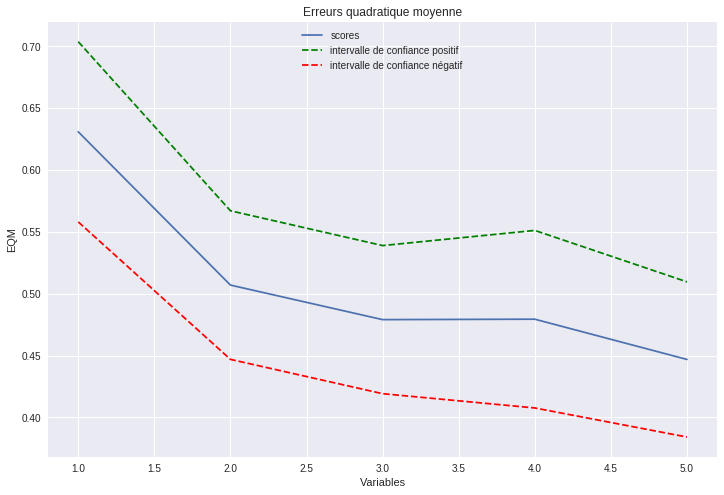

Scores :  [ 0.63088202  0.50697815  0.47905906  0.47941175  0.44687535]


In [42]:
from sklearn.model_selection import GridSearchCV

fig = plt.figure(figsize=(12, 8))

scores = np.abs(clf.cv_results_['mean_test_score'])
scores_std = clf.cv_results_['std_test_score']

plt.plot(clf.param_grid[0]['n_nonzero_coefs'], scores, label='scores')

std_error = scores_std / np.sqrt(n_folds)

plt.plot(clf.param_grid[0]['n_nonzero_coefs'], scores +
         std_error, 'g--', label='intervalle de confiance positif')
plt.plot(clf.param_grid[0]['n_nonzero_coefs'], scores -
         std_error, 'r--', label='intervalle de confiance négatif')
plt.title("Erreurs quadratique moyenne")
plt.xlabel("Variables")
plt.ylabel("EQM")
plt.legend(loc='upper center')
plt.show()

print("Scores : ", scores)